# Computational Programming with Python
### Lecture 4: Functions

### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson, Robert Klöfkorn


## This lecture

- Basic features of functions, passing arguments
- Scope of variables
- Default arguments
- Docstring
- Parameters and arguments
- Return or no return
- Anonymous functions
- Functions as arguments, example: Numerical differentiation

## Basic features

Comparing functions in mathematics and functions in Python

In [1]:
from numpy import*
from matplotlib.pyplot import *
%matplotlib inline

## Functions in mathematics

A function is written as a map, that uniquely assigns an element $y$ from the range $R$ to every element $x$ of the domain $D$.

$$f:x \mapsto y$$

$f$ is the function, $x$ is its argument, $y$ is its (return) value

There can be several arguments of different type. Consider:

$$ f(g, a, b) = \int_a^b g(x) dx $$

The arguments are not interchangeable. Position matters.

## Functions in Python

Definition of a function:

```python
def f(x1, x2, x3):
    # some computations
    y = .... #
    return y
```

Evaluation (call) of a function:

```python
f(17, 18, -2)
f([1, 2, 3], {'tol': 1.e-10}, 'ro')
...
```

Wording:

`x1, x2, x3` are called **parameters** (needed for definition)

`17, 18, -2` are called **arguments** (needed for evaluation)

## Passing arguments

Consider:

In [2]:
def subtract(x1, x2):
    return x1 - x2

Passing arguments by position: (Position matters.)

In [3]:
subtract(1, 2) 

-1

Passing arguments by keywords: (Position doesn't matter)

In [4]:
subtract(x2=2, x1=1) 

-1

## Passing arguments (cont)

Positional arguments come first, then keyword arguments.

In [5]:
def add(x1, x2, x3, x4):
    return sum([x1, x2, x3, x4])

sum1 = add(1, 2, 3, 4) 
print("sum1 =", sum1)

sum1 = 10


In [6]:
sum2 = add(1, 2, x4 = 4, x3 = 3) # this works
print("sum2 =", sum2)

sum2 = 10


In [ ]:
sum3 = add(1, 2, x3 = 3, 4)  # this doesn't work

## Scope of variables

Variables defined inside the function are said to belong to the function’s **scope**. They are unknown outside the function. 

In [7]:
def mult2(x):
    c = 2.   # a local variable
    return c*x

print(mult2(20)) 

# print(c) # doesn't work

40.0


## Parameters and global variables

Compare:

a is a parameter of the function:
```python
def multiply(x, a):
    return a*x
```

a is referenced from outside of the  functions scope, a is a **global** variable:
```python
a = 3
def multiply(x):
    return a*x
```

## Changing argument values inside a function

Example:

In [8]:
def myfunc(nr, interval):
    nr = 0
    interval[0] = 0
    
my_nr = 10
my_interval = [-5, 7]
myfunc(my_nr, my_interval)
print(f"my_nr = {my_nr} my_interval = {my_interval}")

my_nr = 10 my_interval = [0, 7]


## Global variables

In [9]:
a = 3
def multiply(x):
    a = 4
    return a*x

print(f"result = {multiply(5)} a = {a}")

result = 20 a = 3


Inside the function above, `a` is a local variable that is assigned a value. 

In [10]:
a = 3
def print_a():
    print("This is the value of the global variable a:", a)
    
print_a()

This is the value of the global variable a: 3


You can access the value of a global variable but following code doesn't work:

```python
a = 3
def multiply(x):
    a = a + 1  # doesn't work
    return a*x
```

## Default arguments

#### Example &hyphen; Free fall due to gravity

The force $F$ is proportional to the mass $m$, $F = mg$,
where $g$ is the acceleration of gravity. 

On earth $g \approx 9,8 \text{ m}/\text{s}^2$.

In [11]:
def F(m, g = 9.8):
    return m*g

F1 = F(50)
F2 = F(50, 1.625)
print(f"On earth, the force is {F1:0.1f} Newton.")
print(f"On the mooon, the force is {F2:0.1f} Newton.")

On earth, the force is 490.0 Newton.
On the mooon, the force is 81.2 Newton.


In the definition of the function, mandatory parameters must precede optional parameters (those with default values). Why?

## Arguments, Parameters - Summary

Make sure that you understood the difference

- between arguments and parameters
- between function definition and function evaluation (call)
- between positional arguments and keyword arguments

and that you know how to use default arguments.

## Docstring

All functions (and everything else) should be documented carefully.

A docstring is the leading comment in a function (or class):

```python
def newton(f, x0): 
    """
    Newton’s method for computing a zero of a function on input:
    f (function) given function f(x)
    x0 (float) initial guess 
    on return:
    y (float) the approximated zero of f 
    """
...
```

`help(newton)` in Python or `newton?` in IPython displays the docstring as a help text.

## Return or no return

Functions without a return statement can be used for displaying information. 

In [12]:
def show_info(a, b, c):
    print("a =", a)
    print("b =", b)
    print("c =", c)
    
show_info(5, "hi", [10, 20, 20])

a = 5
b = hi
c = [10, 20, 20]


Functions that return a value, can be evaluated without using an assignment.

In [13]:
def add_numbers(a, b, c):
    print("Hello World!")
    return a + b + c

add_numbers(10, 20, 30)
print("huh?")

Hello World!
huh?


## The `return` statement

The `return` statement returns a **single** object!

```python
def myfunc(x):
    return 1, 2, 3, 4, 5, 6
```

What is the object returned here? Which type does it have?

Statements after the `return` statement are ignored.

```python
def myfunc(x):
    return 1, 2, 3
    z = 25  # ignored
```

## No return

A function without a return statement returns `None`.

In [14]:
def show_message():
    print("Hello World!")
    
a = show_message()
print(type(a))
print(a is None)

Hello World!
<class 'NoneType'>
True


## Anonymous functions &hyphen; the `lambda` keyword

With $\lambda$-functions one has a handy tool making one-line function definitions:

In [15]:
f = lambda x: 3*x**2 + 2*x + 0.5

print(f(3))

g = lambda x, y: 3*x - 2*y

print(g(1, 1))

33.5
1


Example for a common application, compute $\int_0^1x^2+5dx$.

In [16]:
import scipy.integrate as si
result, error = si.quad(lambda x: x**2+5, 0, 1)
print(result)

5.333333333333333


Note that the `quad` function assumes that the first argument is a function with **one** parameter.

## Functions as arguments

### Example &hyphen; Numerical differentiation


Let 

$$ f(x) = x^3 + x^2,$$

then

$$ f'(x) = 3x^2 + 2x$$

and 

$$f'(1) = 5.$$

###  Approximating the derivative

We can use some approximation to find the derivative.

Example 1:

$$f'(x) \approx \frac{f(x+h)-f(x)}{h} $$

Example 2:

$$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h} $$

Where $h$ is some small number.

### Using Python

In [17]:
def f(x):
    return x**3 + x**2

def derivative1(f, x, h = 1e-3): # using a default value for h
    return (f(x+h)-f(x))/h

def derivative2(f, x, h = 1e-3):
    return (f(x+h)-f(x-h))/(2*h)

print(f"Using derivative1, f'(1) = {derivative1(f, 1)}")
print(f"Using derivative2, f'(1) = {derivative2(f, 1)}")

Using derivative1, f'(1) = 5.004000999999647
Using derivative2, f'(1) = 5.000000999999754


## Making $h$ smaller

In [18]:
print("   h               f'(1)                 error")
print(56*"-")
for i in range(3,14):
    h = 10**(-i)
    fprime = derivative1(f, 1, h)
    print(f"{h:6} {fprime:23} {fprime-5:25}")

   h               f'(1)                 error
--------------------------------------------------------
 0.001       5.004000999999647      0.004000999999647092
0.0001       5.000400009995687    0.00040000999568690077
 1e-05      5.0000400001248835     4.000012488347693e-05
 1e-06      5.0000039997222245    3.9997222245347075e-06
 1e-07       5.000000404820071     4.048200707984506e-07
 1e-08       4.999999969612645    -3.038735485461075e-08
 1e-09       5.000000413701855    4.1370185499545187e-07
 1e-10       5.000000413701855    4.1370185499545187e-07
 1e-11       5.000000413701855    4.1370185499545187e-07
 1e-12       5.000444502911705    0.00044450291170505807
 1e-13       4.996003610813204     -0.003996389186795568


### Plotting the derivative function

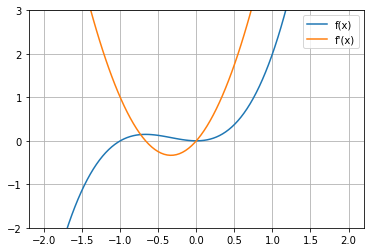

In [19]:
x = linspace(-2, 2, 100)
plot(x, f(x), label = "f(x)")
plot(x, derivative1(f, x), label = "f'(x)")
ylim(-2, 3)
legend()
grid()    # for clarity

## Functions returning functions

Instead of using the special case of a third degree polynomial function
$$f(x) = x^3 +x^2,$$

we will now handle any third degree polynomial function

$$f(x) = ax^3 +bx^2+cx +d.$$

```python
def f(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d
```

This is a generalization. Code made for general cases is reusable.

### The derivative function

The function

```python
def derivative1(f, x, h = 1e-3):
    return (f(x+h)-f(x))/h
```
should remain the same function, if we want to avoid "special cases". However, we cannot use it for our new function f:

```python
def f(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d
```
Why not?

### Using global arguments

We can define a new function, with **one parameter**, using global variables.

In [20]:
a = b = 1  # assigning the same value to multiple variables
c = d = 0 

def new_f(x): 
    return a*x**3+b*x**2+c*x+d  # a, b, c, d are accessed from the global scope

def derivative1(f, x, h = 1e-3): 
    return (f(x+h)-f(x))/h

der = derivative1(new_f, 1)
print(der)

5.004000999999647


### Avoid global arguments, make a function that returns a function

In [21]:
def f(x, a, b, c, d): 
    return a*x**3+b*x**2+c*x+d

def derivative1(f, x, h = 1e-3): 
    return (f(x+h)-f(x))/h

def make_one_parameter_func(f, a, b, c, d):
    def newf(x):
        return f(x, a, b, c, d)
    return newf  # a function is returned

newf = make_one_parameter_func(f, 1, 1, 0, 0)
print("newf(1) =", newf(1))  
der = derivative1(newf, 1)
print("der =", der)

newf(1) = 2
der = 5.004000999999647


## Partial application

The process of fixing the number of arguments by letting a function return a function, is called a **partial application**. Sometimes the word **closure** is used.

### A partial application for other functions

The partial application

```python
def make_one_parameter_func(f, a, b, c, d):
    def newf(x):
        return f(x, a, b, c, d)
    return newf
```
works for all functions of an independent variable $x$ using four coefficients ($a, b, c, d$).

What about $g(x) = A\sin(\omega x)$?

Or $h(x) = ax^4 +bx^3 +cx^2+dx +e$?